<a href="https://colab.research.google.com/github/dahouda2pro/Explainable_AI/blob/main/Image_Classification_complete_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Collection

# Data : Images can be collected in many ways
##### 1. Download manually the images from Google
##### 2. Download datasets from Kaggle
##### 3. Build a Image Web crawler
##### 4. Use Python libraries to scrape the image from bing web browser : pip install bing-image-downloader

In [58]:
#  Download using Python libraries to scrape the image from bing web browser : pip install bing-image-downloader
# 1. Create a empty folder
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [59]:
!pip install bing-image-downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
# 2. We are gonna download 3 categories of images : Computer,
from bing_image_downloader import downloader
downloader.download('computer', limit=100, output_dir='images', adult_filter_off=True) # Downloading 50 images of Computers

[%] Downloading Images to /content/images/computer


[!!]Indexing page: 1

[%] Indexed 16 Images on Page 1.


[%] Downloading Image #1 from http://mn.gov/deaf-commission-stat/makingyourcase/images/computer.jpg
[!] Issue getting: http://mn.gov/deaf-commission-stat/makingyourcase/images/computer.jpg
[!] Error:: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1131)>
[%] Downloading Image #1 from http://touque.ca/EC/students/YeL/computer_glossary_images/Computer.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://electronicbenefitscard.org/wp-content/uploads/2017/01/computer.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.gadgets360cdn.com/large/pc_table_pixabay_1484197407829.jpg?output-quality=80
[%] File Downloaded !

[%] Downloading Image #4 from http://transitlibrarian.com/uploaded_images/computer379-780523.JPG
[%] File Downloaded !

[%] Downloading Image #5 from https://www.asus.c

In [61]:
downloader.download('telephone', limit=100, output_dir='images', adult_filter_off=True) # Downloading 50 images of telephone

Streaming output truncated to the last 5000 lines.
[!!]Indexing page: 742

[%] Indexed 17 Images on Page 742.




[!!]Indexing page: 743

[%] Indexed 17 Images on Page 743.




[!!]Indexing page: 744

[%] Indexed 17 Images on Page 744.




[!!]Indexing page: 745

[%] Indexed 17 Images on Page 745.




[!!]Indexing page: 746

[%] Indexed 17 Images on Page 746.




[!!]Indexing page: 747

[%] Indexed 17 Images on Page 747.




[!!]Indexing page: 748

[%] Indexed 17 Images on Page 748.




[!!]Indexing page: 749

[%] Indexed 17 Images on Page 749.




[!!]Indexing page: 750

[%] Indexed 17 Images on Page 750.




[!!]Indexing page: 751

[%] Indexed 17 Images on Page 751.




[!!]Indexing page: 752

[%] Indexed 17 Images on Page 752.




[!!]Indexing page: 753

[%] Indexed 17 Images on Page 753.




[!!]Indexing page: 754

[%] Indexed 17 Images on Page 754.




[!!]Indexing page: 755

[%] Indexed 17 Images on Page 755.




[!!]Indexing page: 756

[%] Indexed 17 Images on Page 756.




[!!]

In [62]:
downloader.download('ipad', limit=100, output_dir='images', adult_filter_off=True) # Downloading 50 images of ipad

Streaming output truncated to the last 5000 lines.



[!!]Indexing page: 130

[%] Indexed 13 Images on Page 130.




[!!]Indexing page: 131

[%] Indexed 13 Images on Page 131.




[!!]Indexing page: 132

[%] Indexed 13 Images on Page 132.




[!!]Indexing page: 133

[%] Indexed 13 Images on Page 133.




[!!]Indexing page: 134

[%] Indexed 13 Images on Page 134.




[!!]Indexing page: 135

[%] Indexed 13 Images on Page 135.




[!!]Indexing page: 136

[%] Indexed 16 Images on Page 136.




[!!]Indexing page: 137

[%] Indexed 13 Images on Page 137.




[!!]Indexing page: 138

[%] Indexed 16 Images on Page 138.




[!!]Indexing page: 139

[%] Indexed 13 Images on Page 139.




[!!]Indexing page: 140

[%] Indexed 13 Images on Page 140.




[!!]Indexing page: 141

[%] Indexed 13 Images on Page 141.




[!!]Indexing page: 142

[%] Indexed 13 Images on Page 142.




[!!]Indexing page: 143

[%] Indexed 13 Images on Page 143.




[!!]Indexing page: 144

[%] Indexed 13 Images on Page 144.




[

# 2. Data Preprocessing

### Importing some libraries

In [63]:
# Libraries
# Install some libraries
## 1 pip install scikit-image
## 2 pip install matplotlib
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

In [64]:
# Data preprocessing
## 1. Loading the image Data
## 2. Resizing all the images
## 3. Flattening all the numpy array

target = []
images = []
flattened_data = [] # Flatten : convert a matrix (2D) to vector (1D)

DATA_DIRECTORY = '/content/images'
CATEGORIES = ['computer', 'ipad', 'telephone']

for category in CATEGORIES:
    #print(category) # Display : computer, ipad, telephone
    class_num = CATEGORIES.index(category) # Label Encoding
    #print(class_num) # Display : 0, 1, 2
    path = os.path.join(DATA_DIRECTORY, category) # Create path to use all the images
    print(path)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path, img))
       #print(img_array.shape)
       #plt.imshow(img_array)
       # Resize all the image
        img_resized = resize(img_array, (150, 150, 3))
      # Flatten all
        flattened_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(class_num)
        
        
flattened_data = np.array(flattened_data)
target = np.array(target)
images = np.array(images)
        

/content/images/computer
/content/images/ipad
/content/images/telephone


In [65]:
flattened_data[0]

array([1., 1., 1., ..., 1., 1., 1.])

In [66]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [67]:
np.unique(target, return_counts=True)

(array([0, 1, 2]), array([111, 110, 113]))

<BarContainer object of 3 artists>

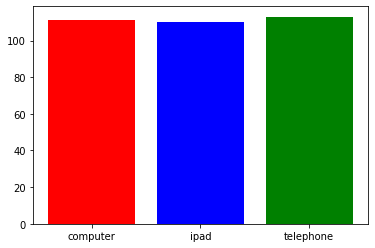

In [68]:
unique, count = np.unique(target, return_counts=True)
plt.bar(CATEGORIES, count, color=['r', 'b', 'g'])

# 3. Split the Data

In [129]:
# Split the data into trainng and testing subset

from sklearn.model_selection import train_test_split

In [130]:
train_test_split(flattened_data, target)

[array([[0.12941176, 0.18431373, 0.31764706, ..., 0.08627451, 0.14117647,
         0.29019608],
        [0.07513072, 0.07905229, 0.09411765, ..., 0.08980392, 0.07431373,
         0.04705882],
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        ...,
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [0.00392157, 0.00392157, 0.82745098, ..., 0.00392157, 0.00392157,
         0.82745098],
        [0.63137255, 0.58823529, 0.51764706, ..., 0.58605447, 0.57869717,
         0.551061  ]]),
 array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [0.96470588, 0.96470588, 0.96470588, ..., 0.96470588, 0.96470588,
         0.96470588],
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        ...,
        [0.90352941, 0.90745098, 0.9254902 , ..., 0.83137255, 0.83137255,
         0.8627451 ],
        [0.3

In [131]:
x_train, x_test, y_train, y_test = train_test_split(flattened_data, target, test_size=0.3, random_state=120)

In [ ]:
print("X train :", x_train.shape)
print("X test :", x_test.shape)
print("Y train :", y_train.shape)
print("Y test :", y_test.shape)

# 4. Machine Learning Algorithms

### 4. 1. Support Vector Machine : SVM

In [72]:
# Support Vector Classifier : SVC
from sklearn.model_selection import GridSearchCV
from sklearn import svm

params_grid = [
    {'C':[1, 10, 100, 1000], 'kernel':['linear']},
    {'C':[1, 10, 100, 1000],'gamma':[0.01, 0.001, 0.0001], 'kernel':['rbf']}
]

svc = svm.SVC(probability=True)
model_svc = GridSearchCV(svc, params_grid)

model_svc.fit(x_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']}])

In [73]:
# Make Prediction with SVM Model
y_pred = model_svc.predict(x_test)
y_pred

array([2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2,
       1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0,
       1, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 0,
       0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 1, 1, 0, 2, 2,
       2, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2])

In [74]:
y_test

array([1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 1, 2, 2, 2, 2, 1,
       0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 1, 1, 2, 1, 2,
       2, 1, 0, 1, 2, 0, 2, 1, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 2, 2,
       1, 2, 1, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2])

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [76]:
accuracy_score(y_pred, y_test)

0.504950495049505

In [77]:
confusion_matrix(y_pred, y_test)

array([[21,  8, 13],
       [ 7, 14,  6],
       [ 5, 11, 16]])

In [78]:
# save the model using Pickle library
import pickle
pickle.dump(model_svc, open('img_model_svc.p','wb'))

In [79]:
# To Load the pickle model
model = pickle.load(open('img_model_svc.p', 'rb'))

### 4.2. Random Forest

In [80]:
"""
The Random Forest Algorithm is another frequently used ensemble learning classifier which uses multiple decision trees. The Random Forest classifier is basically a modified bagging algorithm of a Decision Tree that selects the subsets differently. I found out that max_depth=9 is a good value for this feature-rich dataset
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(x_train, y_train)

print("score on test: " + str(rf.score(x_test, y_test)))
print("score on train: "+ str(rf.score(x_train, y_train)))

# Use the trained model to make predictions
print("Use the trained model to make predictions")
y_pred = rf.predict(x_test)
print(y_pred)

print("   ")
# Evaluate the predictions of the model on the holdout test set
print("--------------------------")
print("Evaluation : RANDOM FOREST")
print("--------------------------")
#precision = precision_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
#print("Precision: {} / Recall: {} ".format(round(precision, 2), round(recall, 2)))
#print("ROC AUC: ", roc_auc_score(y_test, y_pred))
#print("F1 score:", metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))
print("   ")


score on test: 0.5247524752475248
score on train: 1.0
Use the trained model to make predictions
[2 1 1 0 0 0 1 2 1 2 1 0 0 0 1 1 0 1 2 1 2 2 1 1 2 2 0 1 2 0 0 0 1 2 0 0 1
 2 1 2 1 0 0 0 1 2 2 1 0 0 0 0 1 0 0 0 2 0 1 0 2 1 2 1 0 0 0 0 2 0 0 0 2 1
 0 0 2 2 2 0 0 2 0 0 1 1 2 2 0 0 2 2 1 0 0 0 2 2 1 2 0]
   
--------------------------
Evaluation : RANDOM FOREST
--------------------------
Accuracy:  0.5247524752475248
MSE:  1.0693069306930694
   


# 4.3. Random Forest with HPO

In [151]:
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [152]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in  zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [154]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 4, 8, 16, 32]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(x_train, y_train)

print_results(cv)

BEST PARAMS: {'max_depth': 16, 'n_estimators': 100}

0.438 (+/-0.229) for {'max_depth': 2, 'n_estimators': 5}
0.472 (+/-0.18) for {'max_depth': 2, 'n_estimators': 50}
0.451 (+/-0.142) for {'max_depth': 2, 'n_estimators': 100}
0.412 (+/-0.134) for {'max_depth': 4, 'n_estimators': 5}
0.52 (+/-0.16) for {'max_depth': 4, 'n_estimators': 50}
0.532 (+/-0.159) for {'max_depth': 4, 'n_estimators': 100}
0.391 (+/-0.085) for {'max_depth': 8, 'n_estimators': 5}
0.528 (+/-0.186) for {'max_depth': 8, 'n_estimators': 50}
0.532 (+/-0.169) for {'max_depth': 8, 'n_estimators': 100}
0.477 (+/-0.129) for {'max_depth': 16, 'n_estimators': 5}
0.507 (+/-0.155) for {'max_depth': 16, 'n_estimators': 50}
0.55 (+/-0.142) for {'max_depth': 16, 'n_estimators': 100}
0.506 (+/-0.052) for {'max_depth': 32, 'n_estimators': 5}
0.541 (+/-0.173) for {'max_depth': 32, 'n_estimators': 50}
0.506 (+/-0.117) for {'max_depth': 32, 'n_estimators': 100}
